# multiple linear regression 

# step-1 : BUSINESS PROBLEM UNDERSTANDING

. previously, we explored is there any relationship between total adverstising spend and sales? as well as predicting the total sales for some value of total spend.

**what is the relationship between each advertising channel (TV,radio,newspaper) and sales?**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

# step - 2 :  DATA UNDERSTANDING 

**LOAD DATA & UNDERSTAND EVERY VARIABLE**

In [2]:
df = pd.read_csv("C:\\Users\\saisu\\OneDrive\\Documents\\Advertising.csv")
df

,TV,radio,newspaper,sales
0,230100,37800,69200,22100
1,44500,39300,45100,10400
2,17200,45900,69300,9300
3,151500,41300,58500,18500
4,180800,10800,58400,12900
...,...,...,...,...
195,38200,3700,13800,7600
196,94200,4900,8100,9700
197,177000,9300,6400,12800
198,283600,42000,66200,25500


In [3]:
df["TV"].unique().shape

(190,)

**DATASET UNDERSTANDING**

In [5]:
df.info 

<bound method DataFrame.info of          TV  radio  newspaper  sales
0    230100  37800      69200  22100
1     44500  39300      45100  10400
2     17200  45900      69300   9300
3    151500  41300      58500  18500
4    180800  10800      58400  12900
..      ...    ...        ...    ...
195   38200   3700      13800   7600
196   94200   4900       8100   9700
197  177000   9300       6400  12800
198  283600  42000      66200  25500
199  232100   8600       8700  13400

[200 rows x 4 columns]>

In [6]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [7]:
df.shape 

(200, 4)

In [8]:
df.size

800

In [10]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

# step-3 : DATA PREPROCESSING

**EXPLORATORY DATA ANALYSIS**



On the basis of this data, how should you spend advertising money in the future? These general questions might lead you to more specific questions:

1. Is there a relationship between ads and sales?

2. How strong is that relationship?

3. Which ad types contribute to sales?

4. What is the effect of each ad type of sales?

5. Given ad spending, can sales be predicted?

In [11]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147042.500000,23264.000000,30554.000000,14022.500000
std,85854.236315,14846.809176,21778.620839,5217.456566
min,700.000000,0.000000,300.000000,1600.000000
25%,74375.000000,9975.000000,12750.000000,10375.000000
50%,149750.000000,22900.000000,25750.000000,12900.000000
75%,218825.000000,36525.000000,45100.000000,17400.000000
max,296400.000000,49600.000000,114000.000000,27000.000000


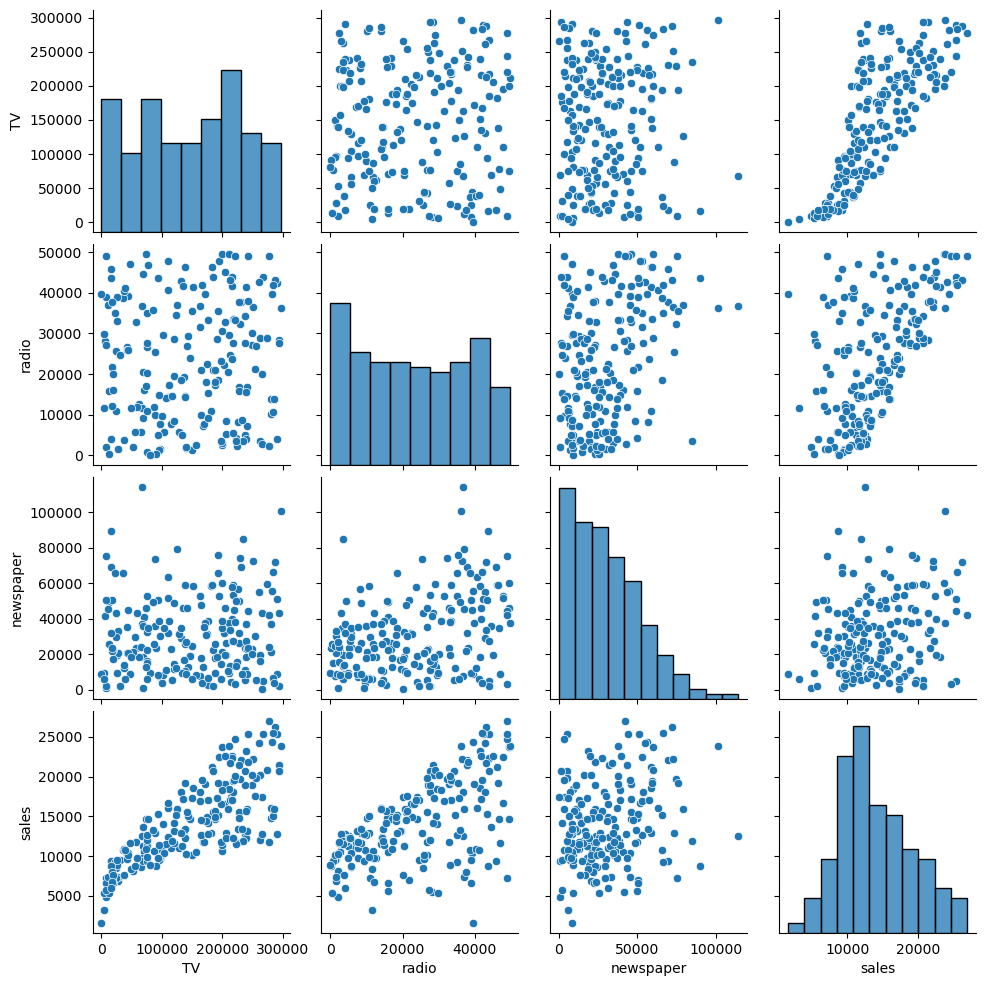

In [12]:
sns.pairplot(df)
plt.show()

**by observing the scatter plot, we made an assumption of the relation between y and ( x 1+x2+x3) is Linear**

In [13]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


• The relation between y and x should be high... The higher the value the stronger the correlation, better accuracy

• The relation between any two independent variables should be low


**If the correlation between any 2 independent variables is strong, then it is called as colinearity problem**

**DATA CLEANING**

In [14]:
#for this dataset,no data cleaning required 


**DATA WANGLING**

In [15]:
#for this dataset,no encoding required 

**CREATING X&y**

In [18]:
X = df[["TV","radio","newspaper"]]
y = df["sales"]

In [19]:
X

,TV,radio,newspaper
0,230100,37800,69200
1,44500,39300,45100
2,17200,45900,69300
3,151500,41300,58500
4,180800,10800,58400
...,...,...,...
195,38200,3700,13800
196,94200,4900,8100
197,177000,9300,6400
198,283600,42000,66200


0      22100
1      10400
2       9300
3      18500
4      12900
       ...  
195     7600
196     9700
197    12800
198    25500
199    13400
Name: sales, Length: 200, dtype: int64

**TRAIN-TEST SPLIT**

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=9)

# step-4: MODELLING 

**Multiple Linear Regression** - Linear regression include multiple input features. This is done by least squares Method

y= beta_{0} + beta_{1}*x_{1} +...+ beta n x n

Each x represents a different feature, and each feature has its own coefficient

• In this case:

y = beta_{0} + beta_{1}*TV + beta_{2}*Ra * dio + beta_{1}*Newspaper

In [31]:
X_train


,TV,radio,newspaper
146,240100,7300,8700
169,284300,10600,6400
145,140300,1900,9000
55,198900,49400,60000
21,237400,5100,23500
...,...,...,...
56,7300,28100,41400
182,56200,5700,29700
199,232100,8600,8700
92,217700,33500,59000


In [36]:
#modelling 
from sklearn.linear_model import LinearRegression 
model = LinearRegression()
model.fit(X_train,y_train)

print("Intercept:",model.intercept_)
print("coefficients:",model.coef_)


Intercept: 2993.5238969041
coefficients: [ 0.04564499  0.18826117 -0.00196948]


In [38]:
#prediction

test_predictions = model.predict(X_test)

# step-5 : EVALUATION METRICS 

In [40]:
print("Test R2",model.score(X_test,y_test))

Test R2 0.9256258465335008


# MODEL SELECTION 

**check whether model has overfitting or underfitting problem**

In [41]:
train_predictions = model.predict(X_train)

print("Train R2",model.score(X_train,y_train))

Train R2 0.8897851719766416


**check wheather test accuracy = cross validation score**

In [44]:
from sklearn.model_selection import cross_val_score
print("cross validation score:",cross_val_score(model,X,y,cv=5).mean())

cross validation score: 0.8871063495438435


**check for assumptions**

**1.Linearity of errors**

In [46]:
test_res = y_test - test_predictions

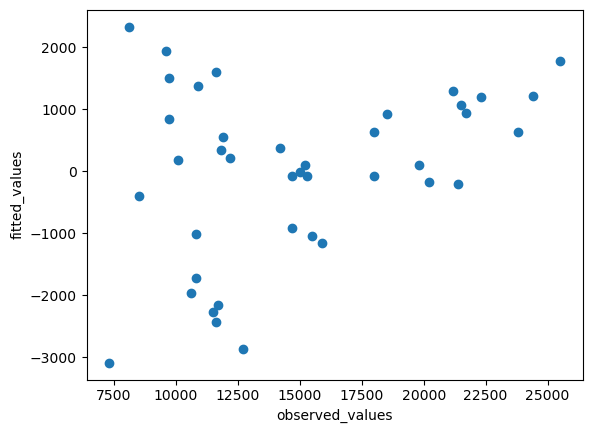

In [48]:
plt.scatter(y_test,test_res)
plt.xlabel("observed_values")
plt.ylabel("fitted_values")
plt.show()

**2.Normality of errors**


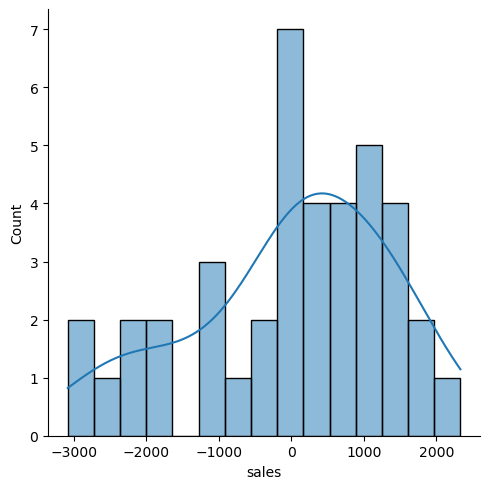

In [49]:
sns.displot(test_res,bins=15,kde=True)
plt.show()

**3.Equal variance of errors(Homoscadesicity)**

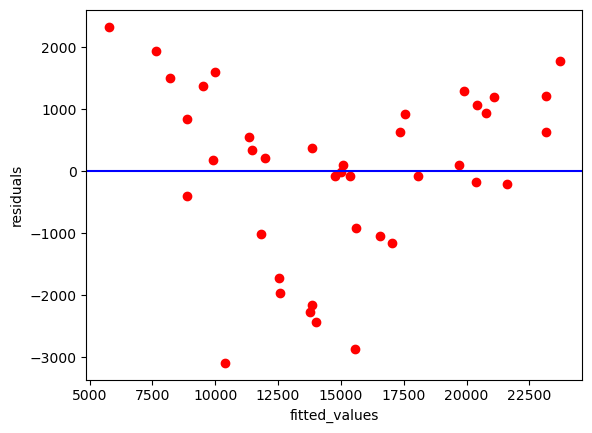

In [55]:
plt.scatter(test_predictions,test_res,c="r")
plt.axhline(y=0,color="blue")
plt.xlabel("fitted_values")
plt.ylabel("residuals")
plt.show()

**4. Variables Significance**

**Hypothesis Testing for variables**

⚫ null hypothesis: There is no relationship between input variable and output variable (and thus beta 1 equals zero)


⚫ alternative hypothesis: There is a relationship between input variable and output variable (and thus beta 1 is not equal to zero) 

In [57]:
import statsmodels.formula.api as smf
model1=smf.ols("y~X",data=df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 27 Nov 2023   Prob (F-statistic):           1.58e-96
Time:                        13:35:28   Log-Likelihood:                -1767.7
No. Observations:                 200   AIC:                             3543.
Df Residuals:                     196   BIC:                             3557.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2938.8894    311.908      9.422      0.000    2323.762    3554.016
X[0]           0.0458      0.001     32.809      0.000       0.043       0.049
X[1]           0.1885      0.009     21.893      0.000       0.172       0.206
X[2]          -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                     4.54e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.54e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Notes:

[1] Standard Errors assume that the covariance matrix of the errors is correctly specified. 

[2] The condition number is large, 1.5ue * 5 This might indicate that there are strong multicollinearity or other numerical problems

**Added variable plot (AV plot)**

partial differention insted of normal differentiation

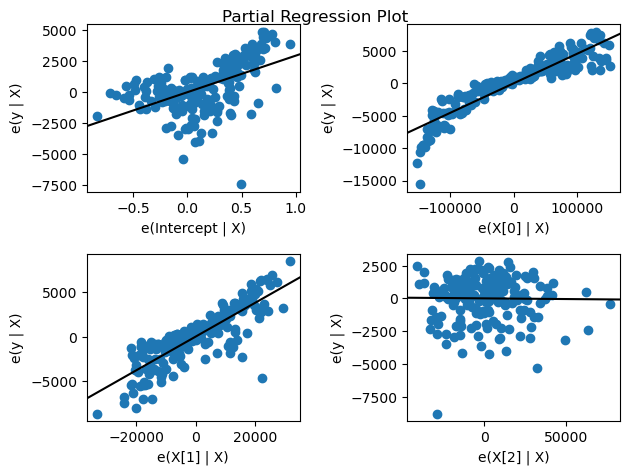

In [61]:
import statsmodels.api as sm 
sm.graphics.plot_partregress_grid(model1)

eval_env:1
eval_env:1
eval_env:1
eval_env:1

added variable plot is not showing any significance for newspaper

# FINAL MODEL INCLUDING TV AND RADIO ONLY

In [71]:
X = df[["TV", 'radio']]

y = df['sales']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=9)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

print("Intercept:",model.intercept_)
print("Coefficients:",model.coef_)
    

train_predictions = model.predict(X_train) 
test_predictions = model.predict(X_test)

print("Train R2:",model.score(X_train,y_train))
print("Test 82:", model.score(X_test,y_test))
print("Cross Validation Score:",cross_val_score(model,X,y,cv=5).mean())

Intercept: 2957.3621138207127
Coefficients: [0.04565331 0.18718911]
Train R2: 0.8897265958178805
Test 82: 0.9258743223517101
Cross Validation Score: 0.889282957306453


**Interpreting the coefficients**

• Holding all other features fixed,  a **1 unit increase in TV Spend** is associated with an**increase of 0.0456 units in sales.**

• This basically means that for every $1000 dollars spend on TV Ads, we could expect 45 more units sold.





• Holding all other features fixed, a **1 unit increase in Radio Spend** is associated with an **increase in sales 0.187 units in sales**.

• This basically means that for every $1000 dollars spend on Radio Ads, we could expect 187 more units sold.




**Variance Inflation Factor (VIF)**

• VIF measures the ratio between the variance for a given regression coefficient with only that variable in the model versus the variance for a given regression coefficient with all variables in the model.

In [73]:
df[["TV","radio","newspaper"]].corr()

,TV,radio,newspaper
TV,1.000000,0.054809,0.056648
radio,0.054809,1.000000,0.354104
newspaper,0.056648,0.354104,1.000000


In [79]:
#calculating VIF's values of independent variables

rsq_TV = smf.ols("TV~radio+newspaper",data=df).fit().rsquared
vif_TV = 1/(1-rsq_TV)

rsq_radio = smf.ols("radio~TV+newspaper",data=df).fit().rsquared
vif_radio = 1/(1-rsq_radio)

rsq_newspaper = smf.ols("newspaper~radio+TV",data=df).fit().rsquared
vif_newspaper = 1/(1-rsq_newspaper)

#Storing vif values in a data frame

d1 = {'Variables':['TV','radio','newspaper'], 'VIF':[vif_TV,vif_radio,vif_newspaper]}

Vif_frame = pd.DataFrame(d1)

Vif_frame 

,Variables,VIF
0,TV,1.004611
1,radio,1.144952
2,newspaper,1.145187


. if the VIF > 4 (threshold value = 4)............. then there exists a problem and reinvestigate the problem ..

. if VIF > 4 ,for any independent variable, then drop that particular variable